In [1]:
import numpy.random as nu
import matplotlib.pyplot as plt

In [2]:
def calculate_deepest_lake(y):
    #finding the left and right maximum
    lb=0
    while y[lb]<=y[lb+1]:
        if(lb>=17):
            lb=-1
            return None
        lb= lb+1
    rb=19
    while y[rb]<=y[rb-1]:
        if(rb<=2):
            rb=-1
            return None
        rb=rb-1

    #Create list of the maximum and minimum values
    apex_list = [lb]
    for i in range(lb+1, rb):
        if((y[i]<y[i+1] and y[i]<y[i-1]) or (y[i]>y[i+1] and y[i]>y[i-1])): #If it min or max we add it and have list where
            apex_list.append(i)                                             #odd index -> min, even index -> max.
    apex_list.append(rb)

    max_deep=[lb, rb, 0] #Create list of 3 values: 1 - index of left bound; 2 - index of right bound; 3 - depth of the deepest lake.
    
    temp_maxLB = lb
    temp_maxRB = rb
    temp_max_deep = 0

    for i in range(1, len(apex_list), 2): # Check depth for every minimum
        for j in range(0, i, 2): # Find highest max on the left
            if y[temp_maxLB] < y[apex_list[j]]:
                temp_maxLB = apex_list[j]
        for j in range(i+1, len(apex_list), 2): # Find highest max on the right
            if y[temp_maxRB] < y[apex_list[j]]:
                temp_maxRB = apex_list[j]

        # Compare current max and saved max depth
        temp_max_deep = min(y[temp_maxLB], y[temp_maxRB]) - y[apex_list[i]]
        if(max_deep[2] < temp_max_deep):
            max_deep = [temp_maxLB, temp_maxRB, temp_max_deep]
        temp_maxLB = lb
        temp_maxRB = rb

    #Limit the bounds

    #If the left limit is less than the right limit, we must check the right side of the minimum
    #to see if the right limit is not encountered earlier
    if(y[max_deep[0]] < y[max_deep[1]]):
        i = max_deep[0]+1
        while(y[i]<y[max_deep[0]]):
            i+=1
        max_deep[1] = i
    #If the left limit is less than the right limit, check the left side of the minimum
    elif(y[max_deep[0]] > y[max_deep[1]]):
        i = max_deep[1]-1
        while(y[i]<y[max_deep[1]]):
            i-=1
        max_deep[0] = i

    return max_deep

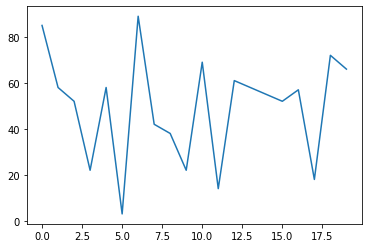

In [3]:
#create list of 20 random numbers(0-100)
y = []
for i in range(20):
    y.append(nu.randint(100))

plt.plot(y)

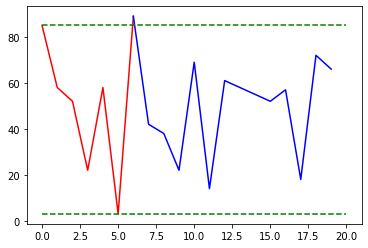

In [4]:
max_deep = calculate_deepest_lake(y)

if max_deep:
    # split the graph into 3 parts to highlight the deepest part
    list1 = []
    list2 = []
    list3 = []

    for i in range(0, max_deep[0]+1):
        list1.append(y[i])
    for i in range(max_deep[0], max_deep[1]+1):
        list2.append(y[i])
    for i in range(max_deep[1], 20):
        list3.append(y[i])
    
    plt.plot(list(range(0, max_deep[0]+1)), list1, 'b')
    plt.plot(list(range(max_deep[0], max_deep[1]+1)), list2, 'r')
    plt.plot(list(range(max_deep[1], 20)), list3, 'b')

    #Draw min and max lines
    x = list(range(0, 21))
    plt.plot(x, [min(y[max_deep[0]], y[max_deep[1]])] * 21, '--g')
    plt.plot(x, [min(y[max_deep[0]], y[max_deep[1]]) - max_deep[2]] * 21, '--g')